In [ ]:
# Capstone Project - Diabetes Prediction

In [16]:
pip install missingno

### 1. Import required libraries

In [17]:
# Import libraries 
import os
import pandas as pd
import numpy as np
import missingno
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
print(os.getcwd())

C:\Users\a2\OneDrive\Documents\Asha\Classes\Simplilearn\10-Capstone\Project 2\Healthcare - Diabetes


### 2. Load the data

In [19]:
os.chdir('C:/Users/a2/OneDrive/Documents/Asha/Classes/Simplilearn/10-Capstone/Project 2/Healthcare - Diabetes')
print(os.getcwd())
data=pd.read_csv("health care diabetes.csv")

C:\Users\a2\OneDrive\Documents\Asha\Classes\Simplilearn\10-Capstone\Project 2\Healthcare - Diabetes


### 3. Exploratory Data Analysis

### 3.1 Understanding dataset

In [21]:
## Shape - count of cols and rows
print("\n This data set has {} rows and {} columns. So, the dataset has {} features".format(data.shape[0], data.shape[1], data.shape[1]-1))

# Head - get first 5 data rows
display(data.head(5))


 This data set has 768 rows and 9 columns. So, the dataset has 8 features


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
# Column names
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [23]:
# get datatypes of columns
display(data.dtypes)
display(data.dtypes.value_counts())

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

int64      7
float64    2
dtype: int64

In [24]:
# data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
# get summary stats for data
# count :- the number of NoN-empty rows in a feature.
# mean :- mean value of that feature.
# std :- Standard Deviation Value of that feature.
# min :- minimum value of that feature.
# max :- maximum value of that feature.
# 25%, 50%, and 75% are the percentile/quartile of each features. 

display(data.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### The stats above show that min value for Glucose, BP, Insulin, BMI is 0. A person whch is not correct, a person has to have some value of Glucose, BP, etc... So, these must be missing values and have to be treated

#### From above, we can see that people without diabetes are higher than people with diabetes. This indicates that the data is imbalanced.

### 3.2 - Data pre-processing/ Data Cleaning

In [26]:
# Check for missing values 
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [27]:
# Check for duplicates
data.duplicated().sum()

0

In [28]:
# Filling in missing values with NaN
data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]] = data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.NaN)

# check missing values after filling with NaN value
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Missing value analysis
#### Understand the distribution of mising values and their relationship. 
#### using matrix to understand the distribution of data and heatmap chart relation of missing value columns

<AxesSubplot:>

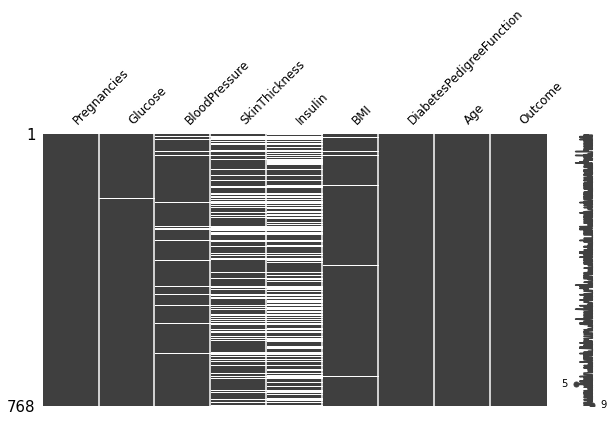

In [29]:
missingno.matrix(data,figsize=(10,5), fontsize=12)

#### The above matrix shows a lot of missing value sin SkinThickness and Insulin columns. 
#### Very few values missing in Glucose column

<AxesSubplot:>

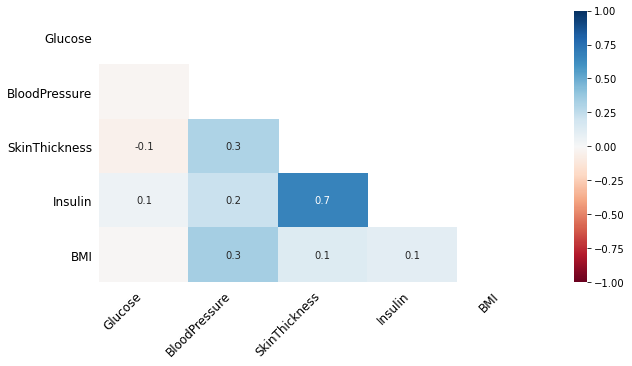

In [30]:
missingno.heatmap(data, figsize=(10,5), fontsize=12)

#### We see a high correlation between SkinThickness and Insulin

#### Plot data using histograms to understand the distribution of each column and see which column has uniform distribution,skew or semi skewed distributions.

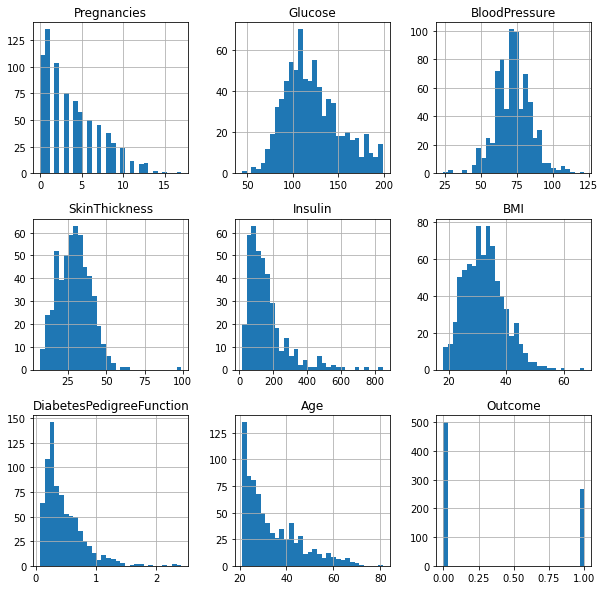

In [33]:
#histogram for each  feature
data.hist(bins=30,figsize=(10,10))
plt.show()

#### The Pregnancies, SkinThickness, Insulin, BMI, DPF, and Age have a skewed distribution so their mean is affected by the outliers. Hence median is better to replace the 0 values in these columns. 
#### Glocose and BP have normal distributions hence we can replace the 0 values in those columns by mean value.

### Missing value treatment

In [39]:
# As the Glucose and BMI columns have less than 15 rows out of 768 rows,
# we will drop the rows that have missing values

data.dropna(subset=['Glucose','BMI'],inplace=True)

# check missing values after dropping rows
data.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                28
SkinThickness               218
Insulin                     360
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [40]:
# Treat the missing values in the other three columns(BloodPressure, SkinThickness, Insulin)
# using KNNImputer

from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

# fit and transform the dataset (exclude the Outcome column)
data_knn = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

data_knn.shape



(752, 9)

In [41]:
display(data_knn.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Now the above data is free of nulls

In [71]:
#3. We observe integer as well as float data-type of variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables
# create a count(frequency) plot
display(data.dtypes.value_counts())
#display(ct)
#data.dtypes.value_counts().plot()
data.dtypes

#sns.countplot(y=data.dtypes ,data=data)
#plt.xlabel("count of each data type")
#plt.ylabel("data types")
#plt.show()


float64    6
int64      3
dtype: int64

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
# check distribution of target vriable, the Outcome column
plt.figure(figsize = (8,4))
#sns.countplot('Outcome',data=data)
sns.countplot(data["Outcome"])
plt.show()

#### From above, we can see that people without diabetes are higher than people with diabetes. This indicates that the data is imbalanced.

### Outlier Removal

<AxesSubplot:xlabel='Pregnancies'>

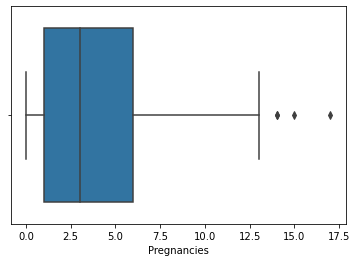

In [47]:
# Using boxplot to detect outliers
sns.boxplot(data=data_knn,x='Pregnancies')

<AxesSubplot:xlabel='Pregnancies'>

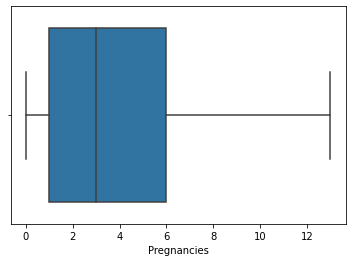

In [48]:
data_clean = data_knn[data_knn["Pregnancies"] <= 13]

# check after removing outliers
sns.boxplot(data=data_clean, x='Pregnancies')

<AxesSubplot:xlabel='Glucose'>

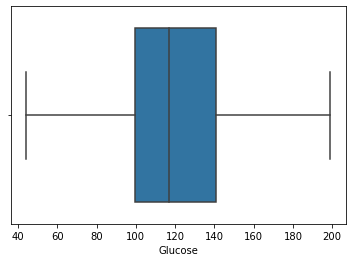

In [49]:
# repeat this for all columns

sns.boxplot(data=data_knn,x='Glucose')

#### No outliers detected in Glucose column

<AxesSubplot:xlabel='BloodPressure'>

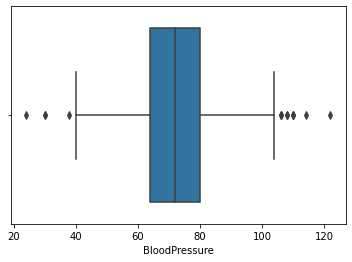

In [50]:
sns.boxplot(data=data_knn,x='BloodPressure')

#### BP less than 39 and greater than 105 have been removed

<AxesSubplot:xlabel='BloodPressure'>

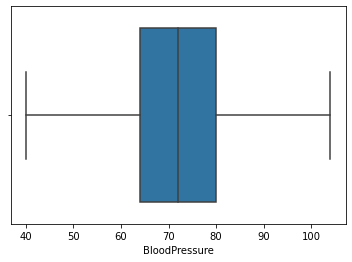

In [51]:
data_clean = data_clean[data_clean["BloodPressure"] >= 39] 
data_clean = data_clean[data_clean["BloodPressure"] <= 105]

# check after removing outliers
sns.boxplot(data=data_clean, x='BloodPressure')

<AxesSubplot:xlabel='SkinThickness'>

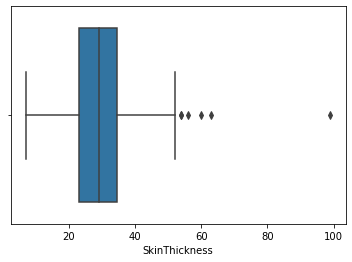

In [52]:
sns.boxplot(data=data_knn,x='SkinThickness')

#### Skinthickness above 60 has been removed

<AxesSubplot:xlabel='SkinThickness'>

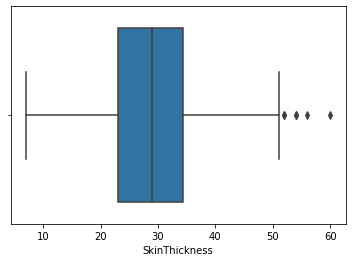

In [53]:
data_clean = data_clean[data_clean["SkinThickness"] <= 60] 

# check after removing outliers
sns.boxplot(data=data_clean, x='SkinThickness')

<AxesSubplot:xlabel='Insulin'>

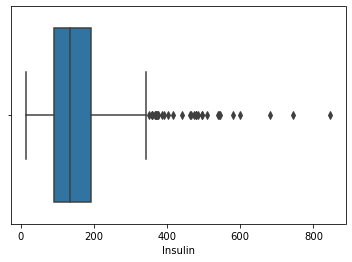

In [54]:
sns.boxplot(data=data_knn,x='Insulin')

#### Insulin level above 500 can skew the resultsm hence removed

<AxesSubplot:xlabel='Insulin'>

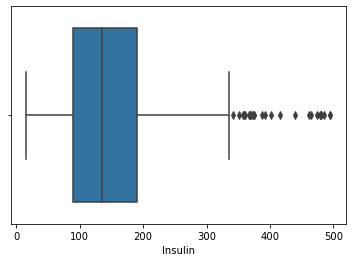

In [55]:
data_clean = data_clean[data_clean["Insulin"] <= 500] 

# check after removing outliers
sns.boxplot(data=data_clean, x='Insulin')

<AxesSubplot:xlabel='BMI'>

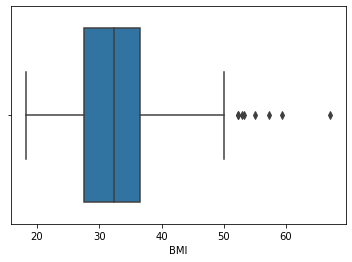

In [56]:
sns.boxplot(data=data_knn,x='BMI')

#### BMI > 60 is removed

<AxesSubplot:xlabel='BMI'>

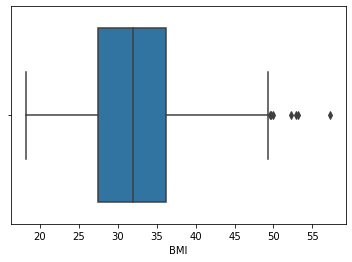

In [57]:
data_clean = data_clean[data_clean["BMI"] <= 60] 

# check after removing outliers
sns.boxplot(data=data_clean, x='BMI')

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

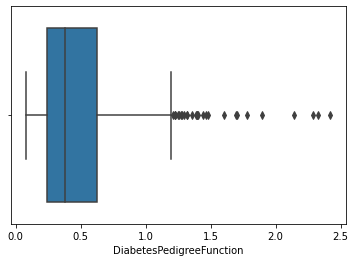

In [58]:
sns.boxplot(data=data_knn,x='DiabetesPedigreeFunction')

#### value above 2.0 is removed

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

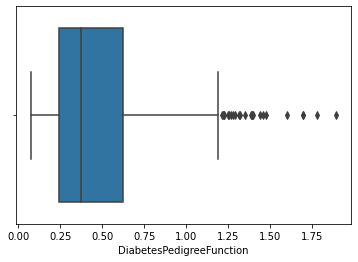

In [59]:
data_clean = data_clean[data_clean["DiabetesPedigreeFunction"] <= 2.0] 

# check after removing outliers
sns.boxplot(data=data_clean, x='DiabetesPedigreeFunction')

<AxesSubplot:xlabel='Age'>

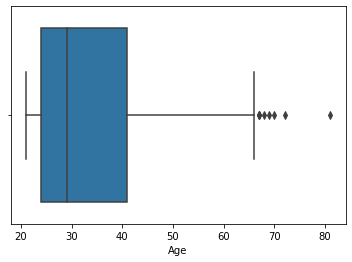

In [60]:
sns.boxplot(data=data_knn,x='Age')

#### Age above 70 is removed

<AxesSubplot:xlabel='Age'>

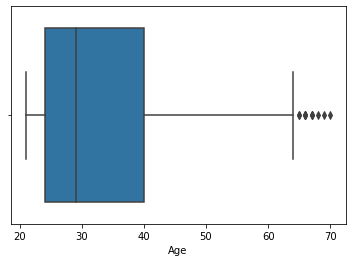

In [61]:
data_clean = data_clean[data_clean["Age"] <= 70] 

# check after removing outliers
sns.boxplot(data=data_clean, x='Age')

#### Approach 2 for checking outliers - need to be stored in a different file

Text(0.5, 1.0, 'Features Box Plot')

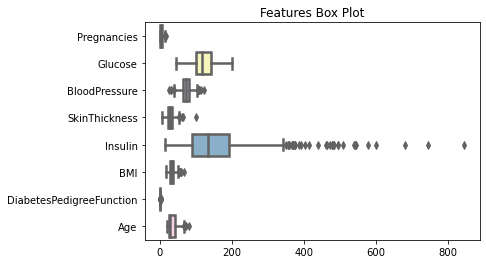

In [188]:
# first store the features in a seperate dataframe.
features = data_knn.drop("Outcome",axis = 1).copy()
# Now plot a boxplot to identify the outliers in our features exclduing the target variable.
sns.boxplot(data = features, orient = 'h', palette = 'Set3', linewidth = 2.5 )
plt.title("Features Box Plot")

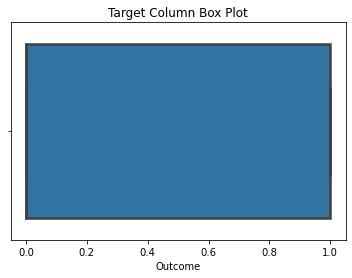

In [29]:
# check outliers in target column
sns.boxplot(x = data_knn["Outcome"], orient = 'h', linewidth = 2.5 )
plt.title("Target Column Box Plot")
plt.show()

#### There are no outliers in Target column

### Plot data using histograms to understand the distribution of each column and see which column has uniform distribution,skew or semi skewed distributions.

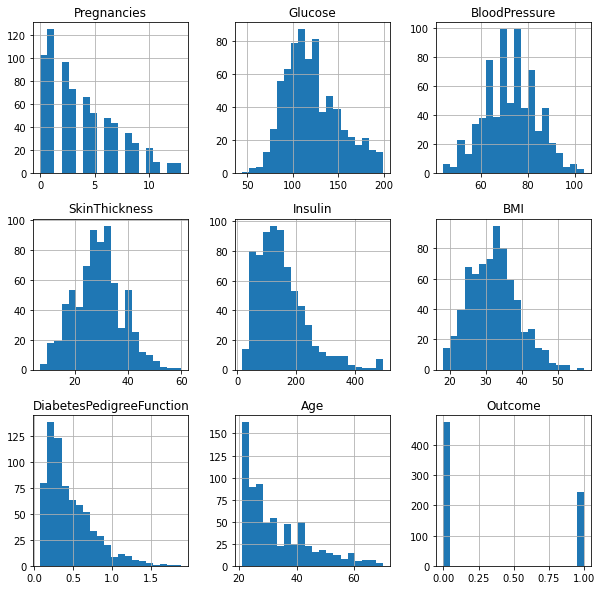

In [30]:
# plot data after outlier removal
data_clean.hist(bins = 20, figsize = (10,10))
plt.show()

#### We can see that the Blood Pressure, SkinThickness and BMI columns have the normal distribution while the rest have skewed distributions.

In [31]:
# Check the data skewness using scipy library for all features/cols
from scipy.stats import skew

# skewness in original data
display(skew(data_knn))

# skeness after cleaning - missing value and outlier treatments
display(skew(data_clean))

array([0.90547948, 0.52163013, 0.13414809, 0.68430603, 2.14024765,
       0.59562466, 1.9002608 , 1.11458681, 0.62407408])

array([0.81932394, 0.5396033 , 0.0405708 , 0.15142184, 1.2997876 ,
       0.40405771, 1.39513461, 1.09322961, 0.67853189])

### 5. Create scatter charts between the pair of variables to understand the relationships. Describe your findings. ???

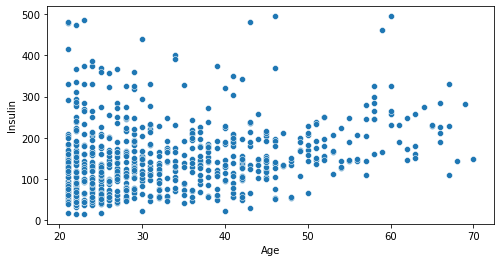

In [69]:
plt.figure(figsize = (8,4))
sns.scatterplot(x='Age',y='Insulin',data=data_clean)
plt.show()

### 6. Do Correlation Analysis using heatmap

<AxesSubplot:>

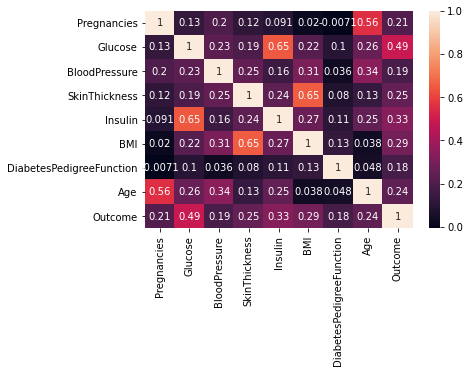

In [32]:
# plot the heatmap to find the correlation of features with each other and with the target column using the seaborn
sns.heatmap(data_clean.corr(), annot = True)

#### Above heatmap shows Glucose has high correlation with the dependant/target variable(Outcome) with value of 0.49

### Remove target column from the dataset

In [33]:
y = data_clean.loc[:,'Outcome']
X = data_clean.drop(['Outcome'],axis = 1).copy()
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
5,5.0,116.0,74.0,20.6,102.8,25.6,0.201,30.0


### Standardize data

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

### Split the data

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

In [36]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (575, 8)
X_test (144, 8)
y_train (575,)
y_test (144,)


### Build the model - KNN model

In [37]:
from sklearn.neighbors import KNeighborsClassifier
KNN= KNeighborsClassifier(n_neighbors=10)
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [38]:
# Predict
y_pred= KNN.predict(X_test)

In [39]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[87 11]
 [21 25]]


In [48]:
# Check model accuracy
KNN_accuracy = accuracy_score(y_test, y_pred)
display(KNN_accuracy)
display(recall_score(y_test, y_pred))
display(precision_score(y_test, y_pred))
# MSE

# OR it can be calculated this way too
recall_sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
recall_specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
recall_sensitivity, recall_specificity

0.7777777777777778

0.5434782608695652

0.6944444444444444

(0.5434782608695652, 0.8877551020408163)

### Create a classification report by analysing sensitivity, specificity, AUC(ROC curve) etc. Please try to be as descriptive as possible to explain what values of these parameter you settled for? any why?

In [44]:
# create classification report
from sklearn.metrics import classification_report
#evaluating our model for prediction accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.89      0.84        98
         1.0       0.69      0.54      0.61        46

    accuracy                           0.78       144
   macro avg       0.75      0.72      0.73       144
weighted avg       0.77      0.78      0.77       144



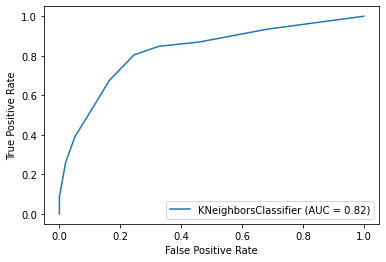

In [45]:
# ROC curve and calculation of AUC
from sklearn import metrics
metrics.plot_roc_curve(KNN, X_test, y_test)
plt.show()

#### From the above curve, AOc value is 82 i.e this model has a chance of predicting correctly 82% 

In [ ]:
# Calculate specificity

In [ ]:
#### Calculate AOC
#### To quantify this, we can calculate the AUC – area under the curve – which tells us how much of the plot is located under the curve.

#### The closer AUC is to 1, the better the model. A model with an AUC equal to 0.5 is no better than a model that makes random classifications.


### Compare using other models

#### Logistic Regrssion model

In [262]:
from sklearn.linear_model import LogisticRegression
LogR = LogisticRegression()
LogR.fit(X_train, y_train)

LogisticRegression()

In [263]:
# Predict
y_pred = LogR.predict(X_test)

In [265]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[88 10]
 [23 23]]


In [266]:
# Check model accuracy
LogR_accuracy = accuracy_score(y_test, y_pred)
display(LogR_accuracy)
display(recall_score(y_test, y_pred))
display(precision_score(y_test, y_pred))
# MSE

0.7708333333333334

0.5

0.696969696969697

In [267]:
# ROC

In [268]:
# SVM model
from sklearn.svm import SVC

svc= SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred= svc.predict(X_test)

In [269]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Check model accuracy
svc_accuracy = accuracy_score(y_test, y_pred)
display(svc_accuracy)
display(recall_score(y_test, y_pred))
display(precision_score(y_test, y_pred))
# MSE

[[88 10]
 [25 21]]


0.7569444444444444

0.45652173913043476

0.6774193548387096

In [270]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(n_estimators=200, random_state=5, criterion='gini', max_depth=100)
rfc.fit(X_train,y_train)
y_pred= rfc.predict(X_test)

In [271]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Check model accuracy
rfc_accuracy = accuracy_score(y_test, y_pred)
display(rfc_accuracy)
display(recall_score(y_test, y_pred))
display(precision_score(y_test, y_pred))
# MSE

[[88 10]
 [20 26]]


0.7916666666666666

0.5652173913043478

0.7222222222222222

In [272]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

DTree = DecisionTreeClassifier(random_state=10, max_depth=100)
DTree.fit(X_train,y_train)
y_pred= DTree.predict(X_test)

In [273]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Check model accuracy
DTree_accuracy = accuracy_score(y_test, y_pred)
display(DTree_accuracy)
display(recall_score(y_test, y_pred))
display(precision_score(y_test, y_pred))
# MSE

[[83 15]
 [27 19]]


0.7083333333333334

0.41304347826086957

0.5588235294117647

In [274]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
GB= GradientBoostingClassifier(n_estimators=30,learning_rate=0.22,loss="deviance")
GB.fit(X_train,y_train)
y_pred= GB.predict(X_test)

In [275]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Check model accuracy
GB_accuracy = accuracy_score(y_test, y_pred)
display(GB_accuracy)
display(recall_score(y_test, y_pred))
display(precision_score(y_test, y_pred))
# MSE

[[89  9]
 [19 27]]


0.8055555555555556

0.5869565217391305

0.75

In [280]:
# Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
ADA=AdaBoostClassifier(learning_rate= 0.15,n_estimators= 40)
ADA.fit(X_train,y_train)
y_pred= ADA.predict(X_test)

In [283]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Check model accuracy
ADA_accuracy = accuracy_score(y_test, y_pred)
display(ADA_accuracy)
display(recall_score(y_test, y_pred))
display(precision_score(y_test, y_pred))
# MSE

[[92  6]
 [23 23]]


0.7986111111111112

0.5

0.7931034482758621

In [284]:
models_accuracy = {
    'Logistic Regression': LogR_accuracy,
    'K-Nearest Neighbors' : KNN_accuracy,
    'Support Vector Machine' : svc_accuracy,
    'Random Forest': rfc_accuracy,
    'Decission Tree Classifier': DTree_accuracy,
    'ADABoost Classifier': ADA_accuracy,
    'Gradient Boosting Classifier': GB_accuracy
    
}

In [285]:
results = pd.DataFrame([[key, models_accuracy[key]] for key in models_accuracy.keys()],
                       columns=['Models', 'Accuracies']).sort_values('Accuracies', ascending=False)
results

,Models,Accuracies
6,Gradient Boosting Classifier,0.805556
5,ADABoost Classifier,0.798611
3,Random Forest,0.791667
1,K-Nearest Neighbors,0.777778
0,Logistic Regression,0.770833
2,Support Vector Machine,0.756944
4,Decission Tree Classifier,0.708333
